In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import datajoint as dj
dj.config['database.host'] = os.environ['DJ_HOST']
dj.config['database.user'] = os.environ['DJ_USER']
dj.config['database.password'] = os.environ['DJ_PASS']
dj.config['enable_python_native_blobs'] = True
dj.config['schema_name'] = "anix_nnfabrik_bias_transfer_adv_noise"
# dj.config['schema_name'] = "anix_nnfabrik_bias_transfer_test"

import matplotlib.pyplot as plt
import numpy as np
from bias_transfer.dataset import dataset_loader
from bias_transfer.config import *
from bias_transfer.trainer import trainer
from bias_transfer.models import resnet_builder
from bias_transfer.analysis import *
from bias_transfer.main import *


from bias_transfer.tables.base import *
from bias_transfer.tables.transfer import *
import nnfabrik as nnf
# nnf.config['repos'] = ['/notebooks/nnfabrik']
from nnfabrik.main import *
schema

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Schema `anix_nnfabrik_bias_transfer_adv_noise`

In [21]:
schema.jobs

table_name className of the table,key_hash key hash,"status if tuple is missing, the job is available",key structure containing the key,error_message error message returned if failed,error_stack error stack if failed,user database user,host system hostname,pid system process id,connection_id connection_id(),timestamp automatic timestamp
__trained_model,fc2f3bbf62047c54b44cc2273ddd60c2,reserved,=BLOB=,,=BLOB=,anix@cantor.mvl6.uni-tuebingen.de,552c85b47aaa,1,9823,2020-02-07 01:58:19
__trained_model,fc6629c12d273f4c122eeb87a99d4760,reserved,=BLOB=,,=BLOB=,anix@kowalewskaja.mvl6.uni-tuebingen.de,39ff107f1151,1,10001,2020-02-07 08:32:50
__trained_model,ff2b7a15f189c091b64ccc20b8fc5e9f,reserved,=BLOB=,,=BLOB=,anix@pythagoras.mvl6.uni-tuebingen.de,805dc322a070,1,9718,2020-02-06 12:56:01
__trained_transfer_model,1f9ca1df3031711e364ff95f55223f1e,reserved,=BLOB=,,=BLOB=,anix@kowalewskaja.mvl6.uni-tuebingen.de,10d5d8a5220a,1,10002,2020-02-07 08:32:55
__trained_transfer_model,47f916f9a24d6f7dd87c24644071f462,reserved,=BLOB=,,=BLOB=,anix@pythagoras.mvl6.uni-tuebingen.de,805dc322a070,1,9719,2020-02-07 10:23:53
__trained_transfer_model,b6384fb7bab1bc7963480671f63c2b3d,reserved,=BLOB=,,=BLOB=,anix@russell.mvl6.uni-tuebingen.de,6e1d183f9faa,1,9721,2020-02-07 09:32:47
__trained_transfer_model,eb040770de7f2b1101b8128f4364c8f1,reserved,=BLOB=,,=BLOB=,anix@russell.mvl6.uni-tuebingen.de,d568e3079883,1,9824,2020-02-07 10:36:58
__trained_transfer_model,fd489b09b65177d779aae449d79fb4f3,reserved,=BLOB=,,=BLOB=,anix@kowalewskaja.mvl6.uni-tuebingen.de,e80a4c24daf7,1,8355,2020-02-05 08:01:59


In [2]:
fill_logit_reg_experiment()

In [22]:
ConfigToTrain()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,model_fn name of the model function,model_hash hash of the model configuration,seed Random seed that is passed to the model- and dataset-builder,config configuration object,config_fabrikant Name of the contributor that added this entry,comment short description,ts UTZ timestamp at time of insertion
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.seed_8,2020-01-26 21:42:13
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,13,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.seed_13,2020-01-26 21:42:30
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,42,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1,2020-01-26 21:41:56
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,8,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.seed_8,2020-01-25 16:27:43
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,13,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.seed_13,2020-01-25 16:27:54
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,42,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True,2020-01-23 19:58:25
bias_transfer.trainer.trainer,1a0911585fb977d44c47bebf35f620b2,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.seed_8,2020-01-25 16:27:42
bias_transfer.trainer.trainer,1a0911585fb977d44c47bebf35f620b2,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,13,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.seed_13,2020-01-25 16:27:53
bias_transfer.trainer.trainer,1a0911585fb977d44c47bebf35f620b2,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,42,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5,2020-01-23 19:58:23
bias_transfer.trainer.trainer,1cbf4528661977990748b9ae1ba2dc0a,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,edd18a6cb41152195f5a7370d7984e1d,8,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_std_0.08_0.2.0.12_0.2.0.18_0.2.0.26_0.2.0.38_0.2.noise_adv_regression_True.seed_8,2020-02-03 16:22:23


In [23]:
TrainedModel()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,model_fn name of the model function,model_hash hash of the model configuration,seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.resnet50.100.CIFAR100.128,59.04,=BLOB=,Arne Nix,2020-01-27 15:23:08
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,13,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.resnet50.100.CIFAR100.128,57.04,=BLOB=,Arne Nix,2020-01-27 13:09:44
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,42,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.resnet50.100.CIFAR100.128,58.65,=BLOB=,Arne Nix,2020-01-28 12:50:34
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,8,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.resnet50.100.noise_adv_classification.CIFAR100.128,66.15,=BLOB=,Arne Nix,2020-01-26 06:43:18
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,13,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.resnet50.100.noise_adv_classification.CIFAR100.128,66.2,=BLOB=,Arne Nix,2020-01-25 23:37:09
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,42,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.resnet50.100.noise_adv_classification.CIFAR100.128,65.43,=BLOB=,Arne Nix,2020-01-24 10:20:21
bias_transfer.trainer.trainer,1a0911585fb977d44c47bebf35f620b2,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.resnet50.100.CIFAR100.128,66.2,=BLOB=,Arne Nix,2020-01-26 06:53:08
bias_transfer.trainer.trainer,1a0911585fb977d44c47bebf35f620b2,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,13,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.resnet50.100.CIFAR100.128,64.6,=BLOB=,Arne Nix,2020-01-26 13:48:30
bias_transfer.trainer.trainer,1a0911585fb977d44c47bebf35f620b2,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,42,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.resnet50.100.CIFAR100.128,66.64,=BLOB=,Arne Nix,2020-01-24 02:49:32
bias_transfer.trainer.trainer,1cbf4528661977990748b9ae1ba2dc0a,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models

# Transfer

In [24]:
ConfigToTrainAndTransfer()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,model_fn name of the model function,model_hash hash of the model configuration,seed Random seed that is passed to the model- and dataset-builder,transfer_1_model_fn name of the model function,transfer_1_model_hash hash of the model configuration,transfer_1_dataset_fn name of the dataset loader function,transfer_1_dataset_hash hash of the configuration object,transfer_1_trainer_fn name of the Trainer loader function,transfer_1_trainer_hash hash of the configuration object,transfer_1_seed Random seed that is passed to the model- and dataset-builder,config configuration object,transfer_1_config configuration object,config_fabrikant Name of the contributor that added this entry,comment short description,ts UTZ timestamp at time of insertion
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,8,=BLOB=,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.seed_8 optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8.transfer_True.freeze_True.transfer,2020-01-26 21:42:13
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,13,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,13,=BLOB=,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.seed_13 optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_13.transfer_True.freeze_True.transfer,2020-01-26 21:42:30
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,42,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,42,=BLOB=,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1 optimizer_Adam.lr_0.0003.lr_decay_0.8.transfer_True.freeze_True.transfer,2020-01-26 21:41:56
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,8,=BLOB=,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.seed_8 optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8.transfer_True.freeze_True.transfer,2020-01-25 16:27:43
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,13,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,13,=BLOB=,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True.seed_13 optimizer_Adam.lr_0.00

In [25]:
TrainedTransferModel()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,model_fn name of the model function,model_hash hash of the model configuration,seed Random seed that is passed to the model- and dataset-builder,transfer_1_model_fn name of the model function,transfer_1_model_hash hash of the model configuration,transfer_1_dataset_fn name of the dataset loader function,transfer_1_dataset_hash hash of the configuration object,transfer_1_trainer_fn name of the Trainer loader function,transfer_1_trainer_hash hash of the configuration object,transfer_1_seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,8,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.freeze_True resnet50.100 CIFAR100.128,58.32,=BLOB=,Arne Nix,2020-01-28 20:52:04
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,13,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,13,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.freeze_True resnet50.100 CIFAR100.128,57.8,=BLOB=,Arne Nix,2020-01-29 02:15:34
bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,42,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,42,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.freeze_True resnet50.100 CIFAR100.128,59.32,=BLOB=,Arne Nix,2020-01-29 10:14:00
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,8,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise_adv_classification_True resnet50.100.noise_adv_classification CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.freeze_True resnet50.100 CIFAR100.128,66.43,=BLOB=,Arne Nix,2020-01-26 21:37:33
bias_transfer.trainer.trainer,01f815cc5c80af5235c0f3126c0c4d73,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,b958ed1247dabfec6ed861d0097123ce,13,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,13,optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.5.None_0.5.noise

In [26]:
ConfigToTrainAndTransfer2()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,model_fn name of the model function,model_hash hash of the model configuration,seed Random seed that is passed to the model- and dataset-builder,transfer_1_model_fn name of the model function,transfer_1_model_hash hash of the model configuration,transfer_1_dataset_fn name of the dataset loader function,transfer_1_dataset_hash hash of the configuration object,transfer_1_trainer_fn name of the Trainer loader function,transfer_1_trainer_hash hash of the configuration object,transfer_1_seed Random seed that is passed to the model- and dataset-builder,transfer_2_model_fn name of the model function,transfer_2_model_hash hash of the model configuration,transfer_2_dataset_fn name of the dataset loader function,transfer_2_dataset_hash hash of the configuration object,transfer_2_trainer_fn name of the Trainer loader function,transfer_2_trainer_hash hash of the configuration object,transfer_2_seed Random seed that is passed to the model- and dataset-builder,config configuration object,transfer_1_config configuration object,transfer_2_config configuration object,config_fabrikant Name of the contributor that added this entry,comment short description,ts UTZ timestamp at time of insertion
bias_transfer.trainer.trainer,24a699ad516a8bf14b43545a549d2e00,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,8,=BLOB=,=BLOB=,=BLOB=,Arne Nix,optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8 optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1.seed_8 optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8.transfer_True.freeze_True.transfer,2020-01-26 21:42:14
bias_transfer.trainer.trainer,24a699ad516a8bf14b43545a549d2e00,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,0f96d7c3ca5577db80dfd7d47a35239b,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,765aa70e134dced43ec256c1279d0f9a,8,=BLOB=,=BLOB=,=BLOB=,Arne Nix,"optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8 optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_std_0.08_0.1.0.12_0.1.0.18_0.1.0.26_0.1.0.38_0.1.None_0.5.seed_8.transfer_True.freeze_('readout',).transfer optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8.transfer_True.freeze_('core',).reset_linear_True.transfer",2020-02-05 10:40:41
bias_transfer.trainer.trainer,24a699ad516a8bf14b43545a549d2e00,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,0f96d7c3ca5577db80dfd7d47a35239b,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,c63f8a217f04eac40f22cf68cc90df3e,8,=BLOB=,=BLOB=,=BLOB=,Arne Nix,"optimizer_Adam.lr_0.0003.lr_decay_0.8.seed_8 optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_std_0.08_0.1.0.12_0.

In [27]:
TrainedTransferModel2()

trainer_fn name of the Trainer loader function,trainer_hash hash of the configuration object,dataset_fn name of the dataset loader function,dataset_hash hash of the configuration object,model_fn name of the model function,model_hash hash of the model configuration,seed Random seed that is passed to the model- and dataset-builder,transfer_1_model_fn name of the model function,transfer_1_model_hash hash of the model configuration,transfer_1_dataset_fn name of the dataset loader function,transfer_1_dataset_hash hash of the configuration object,transfer_1_trainer_fn name of the Trainer loader function,transfer_1_trainer_hash hash of the configuration object,transfer_1_seed Random seed that is passed to the model- and dataset-builder,transfer_2_model_fn name of the model function,transfer_2_model_hash hash of the model configuration,transfer_2_dataset_fn name of the dataset loader function,transfer_2_dataset_hash hash of the configuration object,transfer_2_trainer_fn name of the Trainer loader function,transfer_2_trainer_hash hash of the configuration object,transfer_2_seed Random seed that is passed to the model- and dataset-builder,comment short description,score loss,output trainer object's output,fabrikant_name Name of the contributor that added this entry,trainedmodel_ts UTZ timestamp at time of insertion
bias_transfer.trainer.trainer,24a699ad516a8bf14b43545a549d2e00,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,00f08926554103cf7e030812ab79ab43,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,6e8e5cbf3c9278b3cbc0bdb6369fda4a,8,optimizer_Adam.lr_0.0003.lr_decay_0.8 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_snr_1.0_0.9.None_0.1 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.freeze_True resnet50.100 CIFAR100.128,59.73,=BLOB=,Arne Nix,2020-01-29 16:58:37
bias_transfer.trainer.trainer,24a699ad516a8bf14b43545a549d2e00,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,0f96d7c3ca5577db80dfd7d47a35239b,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,765aa70e134dced43ec256c1279d0f9a,8,"optimizer_Adam.lr_0.0003.lr_decay_0.8 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_std_0.08_0.1.0.12_0.1.0.18_0.1.0.26_0.1.0.38_0.1.None_0.5.freeze_('readout',) resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.freeze_('core',).reset_linear_True resnet50.100 CIFAR100.128",67.0,=BLOB=,Arne Nix,2020-02-06 19:21:07
bias_transfer.trainer.trainer,24a699ad516a8bf14b43545a549d2e00,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,0f96d7c3ca5577db80dfd7d47a35239b,8,bias_transfer.models.resnet_builder,10b6e661a5586661bf63b2081d1f83d8,bias_transfer.dataset.dataset_loader,8101e4af46ed0ff1acb4c5701231eb9e,bias_transfer.trainer.trainer,c63f8a217f04eac40f22cf68cc90df3e,8,"optimizer_Adam.lr_0.0003.lr_decay_0.8 resnet50.100 CIFAR100.128 optimizer_Adam.lr_0.0003.lr_decay_0.8.add_noise_True.noise_std_0.08_0.1.0.12_0.1.0.18_0.1.0.26_0.1.0.38_0.1.None_0.

# Analysis

In [86]:
results = ((TrainedTransferModel())
           * (Trainer).proj(transfer_trainer_hash="trainer_hash", transfer_trainer_fn="trainer_fn", transfer_trainer_comment="trainer_comment", transfer_trainer_config="trainer_config")
           *Model.proj(transfer_model_hash="model_hash", transfer_model_fn="model_fn", transfer_model_comment="model_comment")
           *Dataset.proj(transfer_dataset_hash="dataset_hash", transfer_dataset_fn="dataset_fn", transfer_dataset_comment="dataset_comment")
          )  
_, transfer_labels, transfer_output = extract_results(results, result_category="chkpts")

In [ ]:
col_labels, pretrained_labels, pretrained_output = extract_results((TrainedModel()), result_category="chkpts")

In [ ]:
plot_training_dev(col_labels, pretrained_labels, pretrained_output, transfer_labels, transfer_output, category='acc')
plot_training_dev(col_labels, pretrained_labels, pretrained_output, transfer_labels, transfer_output, category='train_loss')

In [ ]:
results = ((TrainedTransferModel())
           * (Trainer).proj(transfer_trainer_hash="trainer_hash", transfer_trainer_fn="trainer_fn", transfer_trainer_comment="trainer_comment", transfer_trainer_config="trainer_config")
           *Model.proj(transfer_model_hash="model_hash", transfer_model_fn="model_fn", transfer_model_comment="model_comment")
           *Dataset.proj(transfer_dataset_hash="dataset_hash", transfer_dataset_fn="dataset_fn", transfer_dataset_comment="dataset_comment")
          )  
_, transfer_labels, transfer_output = extract_results(results)

In [ ]:
col_labels, pretrained_labels, pretrained_output = extract_results((TrainedModel()))

In [ ]:
plot_noise_eval(col_labels, pretrained_labels, pretrained_output, transfer_labels, transfer_output)

In [ ]:
Trainer().fetch("trainer_config", as_dict=True)[0]

# Visualization

In [3]:
config = Config(apply_data_augmentation=False, apply_data_normalization=False, batch_size=128)

In [4]:
data_loaders, model, train_fct = nnf.builder.get_all_parts(dataset_fn=config.dataset_fn,
                                                               dataset_config=config.dataset,
                                                               trainer_fn=config.trainer_fn,
                                                               trainer_config=config.trainer,
                                                               model_fn=config.model_fn,
                                                               model_config=config.model,
                                                           seed=8
                                                               )

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


==> Starting visualization 


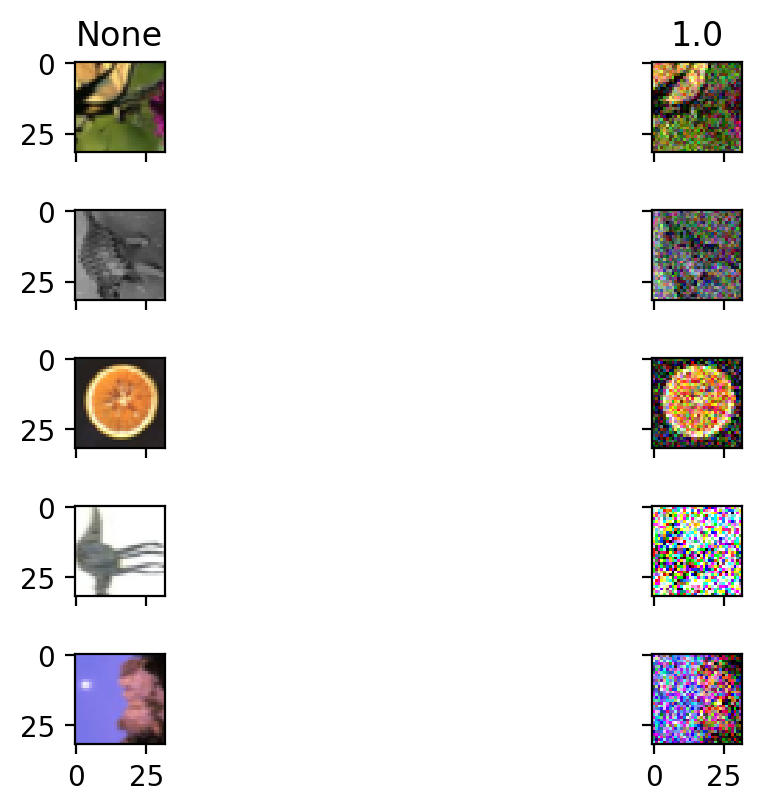

In [5]:
visualize_data(data_loader=data_loaders['val'], num_samples=5, add_noise=True 
               ,noise_snrs=({None:1.0}, {1.0:1.0}), noise_stds=())

In [ ]:
visualize_data(data_loader=data_loaders['val'], num_samples=5, add_noise=True 
               ,noise_snrs=({None:1.0}, {5.0:1.0}, {4.0:1.0}, {3.0:1.0}, {2.0:1.0}, {1.0:1.0}, {0.5:1.0}), noise_stds=())

In [ ]:
visualize_data(data_loader=data_loaders['val'], num_samples=5, add_noise=True 
               ,noise_stds=({None:1.0}, {0.0:1.0}, {0.05:1.0}, {0.1:1.0}, {0.2:1.0}, {0.3:1.0}, {0.5:1.0}, {1.0:1.0}), noise_snrs=())

In [ ]:
visualize_corr_matrix(model=model, data_loader=data_loaders['val'], layer=5, num_samples=2, add_noise=True, noise_snr=({1.0:1.0}), load_from_path='checkpoint/ckpt.optimizer_Adam.lr_0.0003.add_noise_True.noise_std_0.1.pth')

# Misc

In [16]:
(schema.jobs & 'status="error"').delete()